In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("../Data/visualization_data.csv")

In [23]:
df.head()

,ClientID,AccountID,Gender,RiskRate,CompanyName,IsClosed,IsDormant,IsProfileSuspended,IsClientSuspended,ClientTypeName,...,Age,NumOfOrders,LastOrder_Month,LastOrder_Year,NumOfCompleted,NumOfCanceled,AvgPrice,TotalExecutedQuantity,TotalQuantity,Churned
0,0,0,Male,Low,HSB,0,1,0,0,Individuals,...,33,2,10,2022,2,0,1.210000,12000,12000,1
1,1,1,Female,Low,HSB,0,1,1,0,Individuals,...,60,7,9,2022,6,1,1.982429,4347,4529,1
2,2,2,Male,Low,HSB,0,0,0,0,Individuals,...,52,21,2,2024,17,2,7.652667,123895,137395,0
3,3,3,Male,Low,HSB,0,0,0,0,Individuals,...,71,88,3,2024,64,11,72.059886,682538,911078,0
4,4,4,Male,Low,HSB,0,0,0,0,Individuals,...,47,30,2,2024,8,10,2.846267,356686,594953,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClientID               13523 non-null  int64  
 1   AccountID              13523 non-null  int64  
 2   Gender                 13523 non-null  object 
 3   RiskRate               13523 non-null  object 
 4   CompanyName            13523 non-null  object 
 5   IsClosed               13523 non-null  int64  
 6   IsDormant              13523 non-null  int64  
 7   IsProfileSuspended     13523 non-null  int64  
 8   IsClientSuspended      13523 non-null  int64  
 9   ClientTypeName         13523 non-null  object 
 10  OpenDate_Month         13523 non-null  int64  
 11  OpenDate_Year          13523 non-null  int64  
 12  Age                    13523 non-null  int64  
 13  NumOfOrders            13523 non-null  int64  
 14  LastOrder_Month        13523 non-null  int64  
 15  La

In [31]:
churned_df = df[df["Churned"] == 1]

In [35]:
x = churned_df.groupby("ClientID").size().to_list()
count = 0
for y in x:
    if y > 1:
        count += 1

print(count / len(x))

0.26521611290796826


In [11]:
categorical_features = [
    "Gender",
    "RiskRate",
    "CompanyName",
    "IsClosed",
    "IsDormant",
    "IsProfileSuspended",
    "IsClientSuspended",
    "ClientTypeName",
    "OpenDate_Month",
    "OpenDate_Year",
    "BirthDate_Month",
    "BirthDate_Year",
    "LastOrder_Month",
    "LastOrder_Year",
]

In [ ]:
for i in range(len(categorical_features)):
    plt.figure(i, figsize=(25, 10))
    sns.countplot(data=df, x=categorical_features[i], hue="Churned")

plt.tight_layout()

In [5]:
new_df1_target0 = df.loc[df["Churned"] == 0]
new_df1_target1 = df.loc[df["Churned"] == 1]

In [8]:
def uniplot(df, col, title, hue=None):

    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    # plt.yscale("log")
    plt.title(title)
    ax = sns.countplot(
        data=df, x=col, order=df[col].value_counts().index, hue=hue, palette="bright"
    )

    plt.show()

In [ ]:
uniplot(
    new_df1_target1,
    col="Gender",
    title="Distribution of Gender for Churned Customers",
    hue="ClientTypeName",
)

Text(0.5, 1.0, 'Average price by churn')

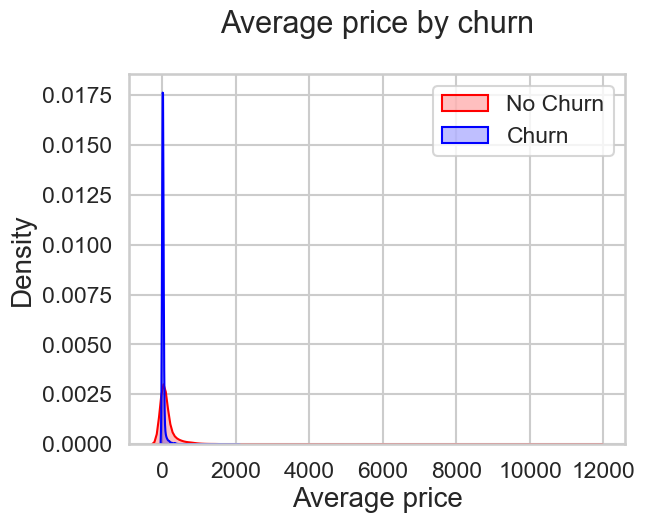

In [20]:
Mth = sns.kdeplot(
    df.NumOfOrders[(df["Churned"] == 0)],
    color="Red",
    fill=True,
)
Mth = sns.kdeplot(
    df.NumOfOrders[(df["Churned"] == 1)],
    ax=Mth,
    color="Blue",
    fill=True,
)
Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Average price")
Mth.set_title("Average price by churn")